<a href="https://colab.research.google.com/github/MSAhmed1414/Brain_Tumor_Classification_Demo/blob/main/VGG_16_for_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning VGG 16 using Keras

Please download the dataset from the below url

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
#from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset (3)/train'
validation_path = '/content/drive/MyDrive/Colab Notebooks/Dataset (3)/validation'
test_path = '/content/drive/MyDrive/Colab Notebooks/Dataset (3)/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Dataset (3)/train/*')
folders

['/content/drive/MyDrive/Colab Notebooks/Dataset (3)/train/yes',
 '/content/drive/MyDrive/Colab Notebooks/Dataset (3)/train/no']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset (3)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 151 images belonging to 2 classes.


In [ ]:
validation_set = validation_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset (3)/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 51 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset (3)/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 51 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
5/5 [==============================] - 77s 9s/step - loss: 1.5623 - accuracy: 0.5154 - val_loss: 1.8054 - val_accuracy: 0.6078
Epoch 2/20
5/5 [==============================] - 2s 499ms/step - loss: 1.1625 - accuracy: 0.6607 - val_loss: 1.1582 - val_accuracy: 0.5490
Epoch 3/20
5/5 [==============================] - 2s 493ms/step - loss: 0.6898 - accuracy: 0.7089 - val_loss: 0.8997 - val_accuracy: 0.6667
Epoch 4/20
5/5 [==============================] - 3s 502ms/step - loss: 0.5626 - accuracy: 0.7873 - val_loss: 0.5274 - val_accuracy: 0.7647
Epoch 5/20
5/5 [==============================] - 2s 503ms/step - loss: 0.4230 - accuracy: 0.8249 - val_loss: 0.4241 - val_accuracy: 0.8039
Epoch 6/20
5/5 [==============================] - 3s 501ms/step - loss: 0.4400 - accuracy: 0.8157 - val_loss: 0.4715 - val_accuracy: 0.8039
Epoch 7/20
5/5 [==============================] - 3s 501ms/step - loss: 0.3118 - accuracy: 0.8531 - val_loss: 0.4436 - val_accuracy: 0.8039
Epoch 8/20
5/5 [======

In [ ]:
import matplotlib.pyplot as plt

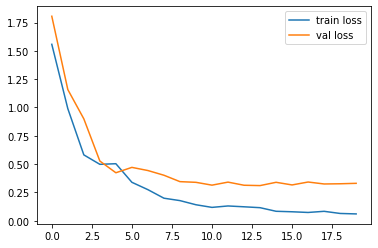

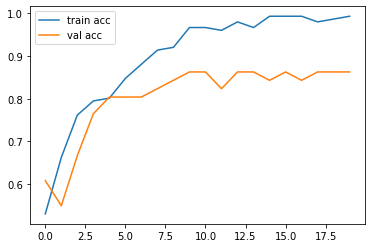

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred